<a href="https://colab.research.google.com/github/AndrewB01/CoffeeShop_Sales_Analysis/blob/main/coffee_shop_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coffee Shop Sales Analysis**

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Coffee Shop Sales.xlsx')

### Data Exploration

In [3]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
df.shape

(149116, 11)

In [11]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [10]:
df.duplicated().any()

False

### Data Analysis

In [12]:
df["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [22]:
df.describe(include=object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [14]:
df["product_category"].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [16]:
df["product_type"].value_counts()

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Pastry                    6912
Biscotti                  5711
Brewed Green tea          5671
Regular syrup             4979
Sugar free syrup          1811
Housewares                 526
Chai tea                   443
Organic Beans              415
Gourmet Beans              366
Premium Beans              336
Espresso Beans             319
Herbal tea                 305
Black tea                  303
Drinking Chocolate         266
Organic Chocolate          221
Clothing                   221
House blend Beans          183
Green tea                  159
Green beans                134
Name: count, dtype: int64

In [18]:
# branch information
df["store_location"].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [19]:
df["store_location"].value_counts()

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

(47000.0, 51000.0)

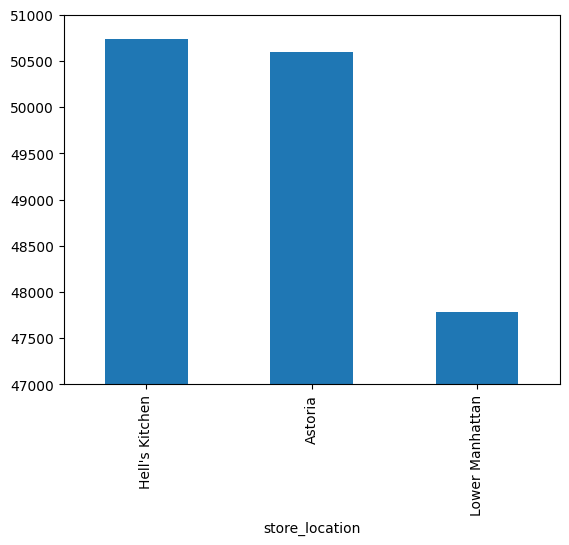

In [23]:
#Performance Graph by Location
df["store_location"].value_counts().plot(kind="bar")
plt.ylim(47000,51000)

In [26]:
# Higher Sales product - New Transation Total Column
df["transaction_total"] = df["transaction_qty"] * df["unit_price"]
df.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_total
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [27]:
df["transaction_total"].value_counts()

transaction_total
3.00     17680
6.00     15254
2.50     13116
3.75     12661
5.00     12420
         ...  
36.00        5
72.00        3
24.00        3
56.00        2
17.00        2
Name: count, Length: 75, dtype: int64

In [28]:
 # Order by product type by higher revenue
 v_product = df.groupby("product_type")["transaction_total"].sum()
 v_product_sorted = v_product.sort_values(ascending=False)
 v_product_sorted

product_type
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Brewed herbal tea        47539.50
Premium brewed coffee    38781.15
Organic brewed coffee    37746.50
Scone                    36866.12
Drip coffee              31984.00
Pastry                   25655.99
Brewed Green tea         23852.50
Biscotti                 19793.53
Premium Beans            14583.50
Organic Beans             8509.50
Housewares                7444.00
Gourmet Beans             6798.00
Clothing                  6163.00
Regular syrup             6084.80
Espresso Beans            5560.25
Chai tea                  4301.25
House blend Beans         3294.00
Herbal tea                2729.75
Drinking Chocolate        2728.04
Black tea                 2711.85
Sugar free syrup          2324.00
Organic Chocolate         1679.60
Green tea                 1470.75
Green beans               1340.00
N

In [34]:
#Create separte Year, Month and Day columns

df["year"] = df["transaction_date"].dt.year
df["month"] = df["transaction_date"].dt.month_name()
df["day"] = df["transaction_date"].dt.day_name()

In [39]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'transaction_total', 'day', 'year', 'month'],
      dtype='object')

In [42]:
df["year"].unique()

array([2023], dtype=int32)

In [43]:
df["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [44]:
def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
  if x_axis:
    order = df[x_axis].value_counts().iloc[:top].index
  else:
    order = df[y_axis].value_counts().iloc[:top].index

  graph = sns.countplot(x = x_axis, y = y_axis, data = df, hue = hue, order = order, palette="RdBu")
  for container in graph.containers:
    graph.bar_label(container)
  plt.xticks(rotation = rotation)
  plt.show()

<ipython-input-44-3fc17a8738d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = df, hue = hue, order = order, palette="RdBu")


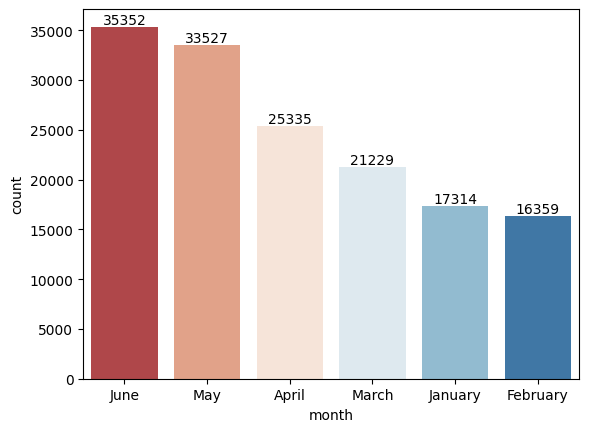

In [45]:
# Bar graph that display months distribution by sales performance
count_plot(x_axis = "month")

<ipython-input-44-3fc17a8738d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = df, hue = hue, order = order, palette="RdBu")


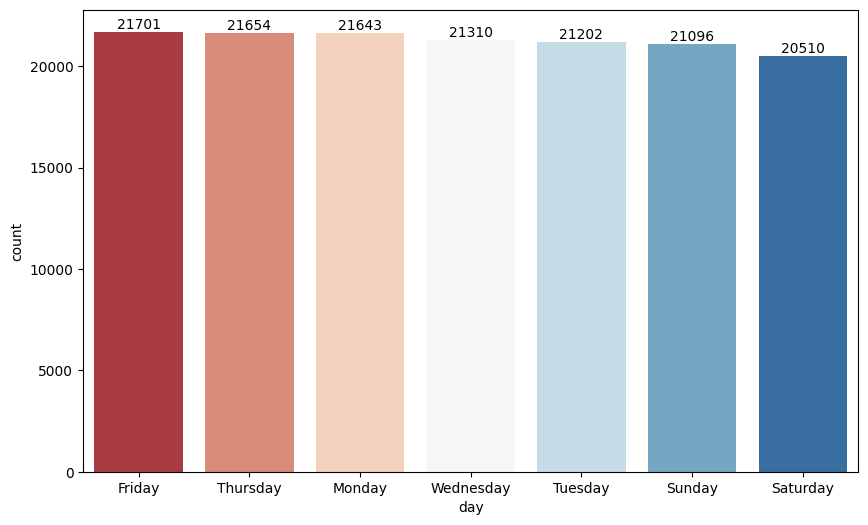

In [47]:
plt.figure(figsize=(10,6))
count_plot(x_axis = "day")

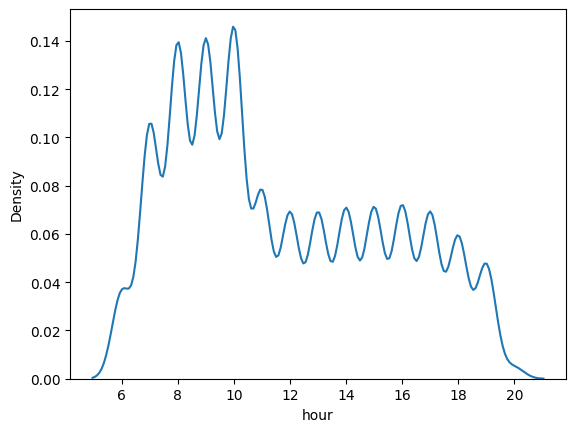

In [48]:
df["hour"] = df["transaction_time"].apply(lambda x: x.hour)
sns.kdeplot(df["hour"])
plt.show()